# Data Exploration  
This is an intial notebook to explore the data and run some basic machine learning to get baseline evaluation metrics that we can aim to imporve on. We will aim to use feature engineering to improve model performance.  

Goals of this notebook:  
Univariate Analysis:  
- Distributions  
- Summary Stats (mean, median, variance, skewness, kurtosis)  
- Outliers/Extreme values  
- Missing Values  

Bivariate Analysis:  
- Correlation heatmaps (feature redundancy)  
- Scatterplots (Sploms)  
- Cross-tabs for categorical data

Supervised Learning:  
- Scikit-Learn for basic evaluation metrics

## Libraries
Let's start by loading in our libraries that we will be using for this notebebook.

In [ ]:
# File system libraries
import os
from google.colab import drive

# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Stat Libraries
import scipy.stats as stats

# Machine Learning Libraries
#import pycaret #Not working with this version of python
import sklearn

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


In [ ]:
pd.set_option('display.float_format','{:.0f}'.format)

## Load Data  
Next we will load the data used for our modelling. We will set this up so it's relatively easy to change the file name in case we decide to add/delete data in our main dataset.

In [ ]:
# Mount the google drive
drive.mount('/content/drive')
# Navigate to the folder and set the file name
path = '/content/drive/MyDrive/Colab Notebooks/696 - Milestone II/696 - Milestone II - Shared/Dataset'

os.chdir(path)
os.getcwd()
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Russell_3000.csv',
 'Russell_3000_Quarter_Annual_0913.csv',
 'Russell_1000',
 'Russel_3000_Quarter_Annual_0913.ipynb']

In [ ]:
filename = 'Russell_3000_Quarter_Annual_0913.csv'
dataset = pd.read_csv(filename)
print(dataset.head())

  Ticker                        Name                  Sector OriginalTicker  \
0   NVDA                 NVIDIA CORP  Information Technology           NVDA   
1   MSFT              MICROSOFT CORP  Information Technology           MSFT   
2   AAPL                   APPLE INC  Information Technology           AAPL   
3   AMZN              AMAZON COM INC  Consumer Discretionary           AMZN   
4   META  META PLATFORMS INC CLASS A           Communication           META   

  YahooSymbol Asset Class  CashAndSTInvestments_2024Q2  \
0        NVDA      Equity                          NaN   
1        MSFT      Equity                  18315000000   
2        AAPL      Equity                  25565000000   
3        AMZN      Equity                  71178000000   
4        META      Equity                  32045000000   

   CashAndSTInvestments_2024Q3  CashAndSTInvestments_2024Q4  \
0                   8563000000                   9107000000   
1                  20840000000                  17

## Dataset Exploration  

Let's start by looking at the dataset to get an idea of what we are working with.

In [ ]:
print(f"We have {dataset.shape[0]} companies.")
print(f"\nCurrently we have {dataset.shape[1]} features")

We have 2614 companies.

Currently we have 122 features


In [ ]:
# Let's look at the comlumns in an easy to read format
columns = list(dataset.columns)
for column in columns:
    print(column)
print(f"\nCurrently we have {len(columns)} features")

Ticker
Name
Sector
OriginalTicker
YahooSymbol
Asset Class
CashAndSTInvestments_2024Q2
CashAndSTInvestments_2024Q3
CashAndSTInvestments_2024Q4
CashAndSTInvestments_2025Q1
CashAndSTInvestments_2025Q2
CashFromOps_2024Q2
CashFromOps_2024Q3
CashFromOps_2024Q4
CashFromOps_2025Q1
CashFromOps_2025Q2
Currency
EPS_2024Q2
EPS_2024Q3
EPS_2024Q4
EPS_2025Q1
EPS_2025Q2
Exchange
Location
LongTermDebt_2024Q2
LongTermDebt_2024Q3
LongTermDebt_2024Q4
LongTermDebt_2025Q1
LongTermDebt_2025Q2
Market Value
NetIncome_2024Q2
NetIncome_2024Q3
NetIncome_2024Q4
NetIncome_2025Q1
NetIncome_2025Q2
Notional Value
OperatingIncome_2024Q2
OperatingIncome_2024Q3
OperatingIncome_2024Q4
OperatingIncome_2025Q1
OperatingIncome_2025Q2
Price
Quantity
Revenue_2024Q2
Revenue_2024Q3
Revenue_2024Q4
Revenue_2025Q1
Revenue_2025Q2
ShortTermDebtOrCurrentLiab_2024Q2
ShortTermDebtOrCurrentLiab_2024Q3
ShortTermDebtOrCurrentLiab_2024Q4
ShortTermDebtOrCurrentLiab_2025Q1
ShortTermDebtOrCurrentLiab_2025Q2
TotalAssets_2024Q2
TotalAssets_2024Q3

## Categorical Data Exploration
Let's start with the first column which is the ticker. We should have all values here but we can confirm. We can look to make sure we have no duplicates by finding unique values and counting them to make sure we still have 2614 companies.

In [ ]:
print(f'There are {dataset['Ticker'].isna().sum()} missing enteries in the Ticker column')

print(f'There are {dataset.shape[0] - dataset['Ticker'].nunique()} duplicated enteries in the Ticker column')

There are 0 missing enteries in the Ticker column
There are 18 duplicated enteries in the Ticker column


Okay, so we clearly have some duplicate symbols. Let's see if we can address this just by dropping duplicate rows in the dataset.

In [ ]:
dataset.drop_duplicates(inplace=True)
print(f"We now have {dataset.shape[0]} company enteries")

We now have 2610 company enteries


So this, addressed 4 enteries but we still have 14 that have the same ticker symbol. We will need to investigate these as to why they have the same symbol but different values in the columns.

In [ ]:
duplicates = dataset.loc[dataset.duplicated('Ticker', keep=False)].sort_values('Ticker')
duplicates

,Ticker,Name,Sector,OriginalTicker,YahooSymbol,Asset Class,CashAndSTInvestments_2024Q2,CashAndSTInvestments_2024Q3,CashAndSTInvestments_2024Q4,CashAndSTInvestments_2025Q1,...,TotalAssets_2024,TotalEquity_2021,TotalEquity_2022,TotalEquity_2023,TotalEquity_2024,TotalLiabilities_2021,TotalLiabilities_2022,TotalLiabilities_2023,TotalLiabilities_2024,Weight (%)_Y
2596,--,OMNIAB INC $12.50 VESTING Prvt,Health Care,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2597,--,OMNIAB INC $15.00 VESTING Prvt,Health Care,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2598,--,ESC GCI LIBERTY INC SR ESCROW,Communication,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2599,--,NEXPOINT DIVERSIFIED CASH ACCRUAL,Real Estate,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2600,--,NEXPOINT DIVERSIFIED CASH ACCRUAL,Real Estate,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2601,--,ESC GCI LIBERTY INC SR ESCROW,Communication,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2604,--,ESC GCI LIBERTY INC SR ESCROW,Communication,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2605,--,OMNIAB INC $12.50 VESTING Prvt,Health Care,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2606,--,OMNIAB INC $15.00 VESTING Prvt,Health Care,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2607,--,OMNIAB INC $15.00 VESTING Prvt,Health Care,--,--,Equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Okay, so most of the duplication was comming from the fact that we don't have a true ticker. However, every single entry in these duplicated symbols are missing all quantitative data, so we can remove them.

In [ ]:
idx_remove = list(duplicates.index)
dataset.drop(index=idx_remove, inplace=True)
print(f"We now have {dataset.shape[0]} company enteries")
print(f'There are {dataset.shape[0] - dataset['Ticker'].nunique()} duplicated enteries in the Ticker column')

We now have 2594 company enteries
There are 0 duplicated enteries in the Ticker column


Next, I see that there are multiple columns that have ticker information, we likely only need the main one. We also want to make sure all Asset classes are equity. So lets address that now.

In [ ]:
dataset.drop(columns=['OriginalTicker','YahooSymbol'],inplace=True)
print(dataset['Asset Class'].unique())

['Equity' 'Money Market' 'Cash' 'Cash Collateral and Margins' 'Futures']


Alright, so we have quite a few asset classes. Let's take a look at a few to make sure they aren't just misrepresented.

In [ ]:
asset_class = 'Cash Collateral and Margins'
asset_class_df = dataset[dataset['Asset Class'] == asset_class]
asset_class_df.head()

,Ticker,Name,Sector,Asset Class,CashAndSTInvestments_2024Q2,CashAndSTInvestments_2024Q3,CashAndSTInvestments_2024Q4,CashAndSTInvestments_2025Q1,CashAndSTInvestments_2025Q2,CashFromOps_2024Q2,...,TotalAssets_2024,TotalEquity_2021,TotalEquity_2022,TotalEquity_2023,TotalEquity_2024,TotalLiabilities_2021,TotalLiabilities_2022,TotalLiabilities_2023,TotalLiabilities_2024,Weight (%)_Y
637,MSFUT,CASH COLLATERAL MSFUT USD,Cash and/or Derivatives,Cash Collateral and Margins,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Okay, there are very few enteries that are not equities and none of them contain quantitative data. So they can be eliminated as well.

In [ ]:
dataset=dataset[dataset['Asset Class'] == 'Equity']
print(dataset['Asset Class'].unique())
dataset.drop(columns='Asset Class',inplace=True)
print(f'We now have {dataset.shape[0]} enteries and {dataset.shape[1]} features')

['Equity']
We now have 2589 enteries and 119 features


Next, let's jump to the currency column. This should all be in USD as we are focusing on US markets.

In [ ]:
print(dataset['Currency'].unique())
dataset.drop(columns='Currency',inplace=True)

['USD']


Let's take a look at the exchanges these companies are traded on. This can be diverse and may have an influence, so it is a categorical variable of interest.

In [ ]:
print(dataset['Exchange'].unique())
#Let's look at how many are No Market
no_data = dataset[dataset['Exchange'] == 'NO MARKET (E.G. UNLISTED)']
print(len(no_data))

non_data = dataset[dataset['Exchange'] == 'Non-Nms Quotation Service (Nnqs)']
print(len(non_data))

#Alright, just one so we can likely drop both of these as they aren't on the main exchanges (NASDAQ, NYSE, CBOE, AMEX (nyse Mkt Llc)).
exchanges_to_drop = ['NO MARKET (E.G. UNLISTED)','Non-Nms Quotation Service (Nnqs)']
dataset = dataset[~dataset['Exchange'].isin(exchanges_to_drop)].copy()
print(f'We now have {dataset.shape[0]} rows')


['NASDAQ' 'New York Stock Exchange Inc.' 'Cboe BZX' 'Nyse Mkt Llc'
 'NO MARKET (E.G. UNLISTED)' 'Non-Nms Quotation Service (Nnqs)']
1
1
We now have 2587 rows


Location may have a direct impact on corporate tax rates, So this will be an important column to keep.

In [ ]:
print(dataset['Location'].isna().sum())
dataset['Location'].unique()

0


array(['United States', 'Sweden', 'Brazil', 'South Africa', 'Canada',
       'Germany', 'Peru', 'Norway', 'Australia', 'United Kingdom',
       'Panama', 'Guernsey', 'Bermuda', 'Israel', 'Singapore', 'Ireland',
       'Monaco', 'Belgium'], dtype=object)

Okay, that all looks quite good so we can move on from categorical data to quantitative data.

## Quantitative Data Exploration

Lets start by looking at the revenue from the quarterly statements.

In [ ]:
columns = ['Revenue_2024Q2',
           'Revenue_2024Q3',
           'Revenue_2024Q4',
           'Revenue_2025Q1',
           'Revenue_2025Q2']
revenue_data = dataset[columns]
revenue_data.head()

,Revenue_2024Q2,Revenue_2024Q3,Revenue_2024Q4,Revenue_2025Q1,Revenue_2025Q2
0,NaN,30040000000,35082000000,39331000000,44062000000
1,64727000000,65585000000,69632000000,70066000000,76441000000
2,85777000000,94930000000,124300000000,95359000000,94036000000
3,147977000000,158877000000,187792000000,155667000000,167702000000
4,39071000000,40589000000,48385000000,42314000000,47516000000


In [ ]:
revenue_data.isna().sum()

,0
Revenue_2024Q2,141
Revenue_2024Q3,27
Revenue_2024Q4,29
Revenue_2025Q1,22
Revenue_2025Q2,27


In [ ]:
revenue_data.describe()

,Revenue_2024Q2,Revenue_2024Q3,Revenue_2024Q4,Revenue_2025Q1,Revenue_2025Q2
count,2446,2560,2558,2565,2560
mean,2011313526,2184082766,2227754238,2166905795,2263384178
std,7429741354,8391149082,8829284810,8418728006,8660251799
min,-1685000000,-1158957000,-1553908000,-5001300000,-483000000
25%,99061000,105002000,110035250,109730000,115370750
50%,364413000,381615000,387156500,382083000,401436500
75%,1203211750,1305325000,1339999250,1308000000,1346664389
max,147977000000,169335000000,187792000000,180554000000,167702000000


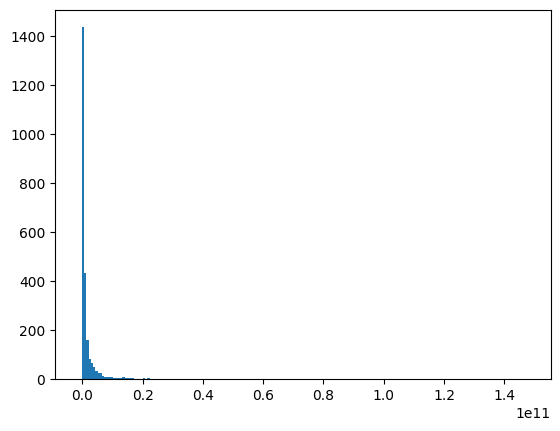

In [ ]:
plt.hist(revenue_data['Revenue_2024Q2'],bins=200);

In [ ]:
max_val = revenue_data['Revenue_2024Q2'].max()
print(max_val)

147977000000.0


In [ ]:
 dataset[dataset['Revenue_2024Q2']==max_val]

,Ticker,Name,Sector,CashAndSTInvestments_2024Q2,CashAndSTInvestments_2024Q3,CashAndSTInvestments_2024Q4,CashAndSTInvestments_2025Q1,CashAndSTInvestments_2025Q2,CashFromOps_2024Q2,CashFromOps_2024Q3,...,TotalAssets_2024,TotalEquity_2021,TotalEquity_2022,TotalEquity_2023,TotalEquity_2024,TotalLiabilities_2021,TotalLiabilities_2022,TotalLiabilities_2023,TotalLiabilities_2024,Weight (%)_Y
3,AMZN,AMAZON COM INC,Consumer Discretionary,71178000000,75091000000,78779000000,66207000000,57741000000,25281000000,25971000000,...,624894000000,138245000000,146043000000,201875000000,285970000000,282304000000,316632000000,325979000000,338924000000,4


Amazon having the largest revenue makes sense. We can see that the data has a heavy left skew.

Lets continue by looking at the cash and short term investements from the quarterly statements.

In [ ]:
columns = ['CashAndSTInvestments_2024Q2',
           'CashAndSTInvestments_2024Q3','CashAndSTInvestments_2024Q4','CashAndSTInvestments_2025Q1','CashAndSTInvestments_2025Q2']
cash_data = dataset[columns]
cash_data.head()

,CashAndSTInvestments_2024Q2,CashAndSTInvestments_2024Q3,CashAndSTInvestments_2024Q4,CashAndSTInvestments_2025Q1,CashAndSTInvestments_2025Q2
0,NaN,8563000000,9107000000,8589000000,15234000000
1,18315000000,20840000000,17482000000,28828000000,30242000000
2,25565000000,29943000000,30299000000,28162000000,36269000000
3,71178000000,75091000000,78779000000,66207000000,57741000000
4,32045000000,43852000000,43889000000,28750000000,12005000000


In [ ]:
cash_data.isna().sum()

,0
CashAndSTInvestments_2024Q2,155
CashAndSTInvestments_2024Q3,31
CashAndSTInvestments_2024Q4,27
CashAndSTInvestments_2025Q1,27
CashAndSTInvestments_2025Q2,32


In [ ]:
cash_data.describe()

,CashAndSTInvestments_2024Q2,CashAndSTInvestments_2024Q3,CashAndSTInvestments_2024Q4,CashAndSTInvestments_2025Q1,CashAndSTInvestments_2025Q2
count,2432,2556,2560,2560,2555
mean,1798588712,1754856716,1772431729,1733356626,1770138643
std,15832841397,13921292944,14260761052,13686527362,14035472431
min,0,0,0,1000,1000
25%,70780500,77024000,78183500,78346750,78810500
50%,208013500,223026500,217962500,211360500,212551000
75%,604089250,651842500,684250000,639117000,663132500
max,530819000000,434260000000,469317000000,425903000000,420327000000


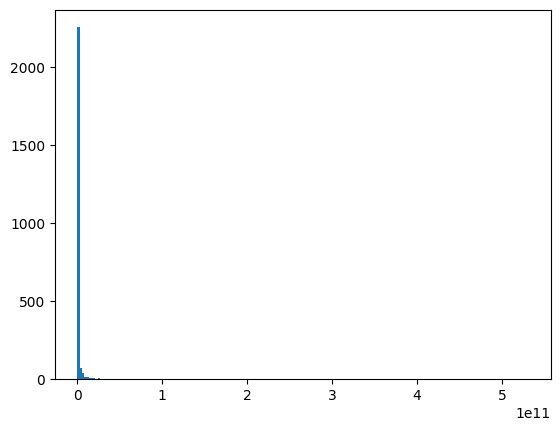

In [ ]:
plt.hist(cash_data['CashAndSTInvestments_2024Q2'],bins=200);

We an see that clearly there is an outlier here by both the 'max' value and the skew of this histogram. So let's take a look at the max value.

In [ ]:
max_val = cash_data['CashAndSTInvestments_2024Q2'].max()
print(max_val)

530819000000.0


In [ ]:
 dataset[dataset['CashAndSTInvestments_2024Q2']==max_val]


,Ticker,Name,Sector,CashAndSTInvestments_2024Q2,CashAndSTInvestments_2024Q3,CashAndSTInvestments_2024Q4,CashAndSTInvestments_2025Q1,CashAndSTInvestments_2025Q2,CashFromOps_2024Q2,CashFromOps_2024Q3,...,TotalAssets_2024,TotalEquity_2021,TotalEquity_2022,TotalEquity_2023,TotalEquity_2024,TotalLiabilities_2021,TotalLiabilities_2022,TotalLiabilities_2023,TotalLiabilities_2024,Weight (%)_Y
10,JPM,JPMORGAN CHASE & CO,Financials,530819000000,434260000000,469317000000,425903000000,420327000000,38469000000,-74081000000,...,4002814000000,294127000000,292332000000,327878000000,344758000000,3449440000000,3373411000000,3547515000000,3658056000000,1


Okay, JPMorgan Chase is a company that we would expect to have very high cash and short term investments. I am going to look at an outside source to cross reference. I will look at the most recent 10Q statement from the SEC website: https://www.sec.gov/search-filings

[Most recent JPM 10Q](https://https://www.sec.gov/ix?doc=/Archives/edgar/data/0000019617/000001961725000615/jpm-20250630.htm#i7f51d6660c094a199e33ebb8dd4036ff_169)

Let's take a look at how many are over $100,000,000.

In [ ]:
temp = dataset[dataset['CashAndSTInvestments_2024Q2'] > 100000000]
print(len(temp))

1657


Next, lets take a look at the data that we will evenutally try to predict. Earnings per share.

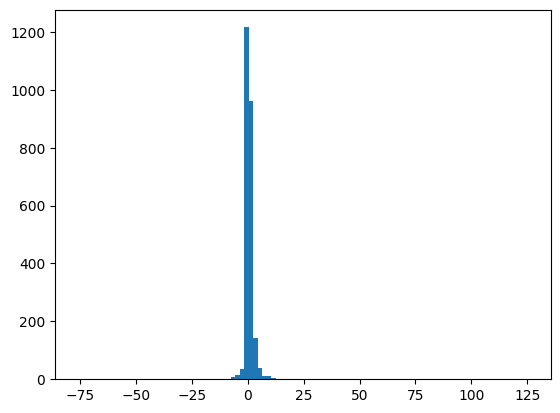

In [ ]:
columns = ['EPS_2024Q2',
           'EPS_2024Q3',
           'EPS_2024Q4',
           'EPS_2025Q1',
           'EPS_2025Q2']
eps_data = dataset[columns]
plt.hist(eps_data['EPS_2024Q2'],bins=100);

In [ ]:
eps_data.describe()

,EPS_2024Q2,EPS_2024Q3,EPS_2024Q4,EPS_2025Q1,EPS_2025Q2
count,2462,2534,2324,2488,2311
mean,1,1,1,1,1
std,5,5,8,3,5
min,-76,-153,-275,-21,-78
25%,-0,-0,-0,-0,-0
50%,0,0,0,0,0
75%,1,1,1,1,1
max,125,130,140,95,109


In [ ]:
eps_data.head()

,EPS_2024Q2,EPS_2024Q3,EPS_2024Q4,EPS_2025Q1,EPS_2025Q2
0,NaN,1,1,1,1
1,3,3,3,3,4
2,1,1,2,2,2
3,1,1,2,2,2
4,5,6,8,6,7


We may want to get better accuracy with float values instead of integers here.

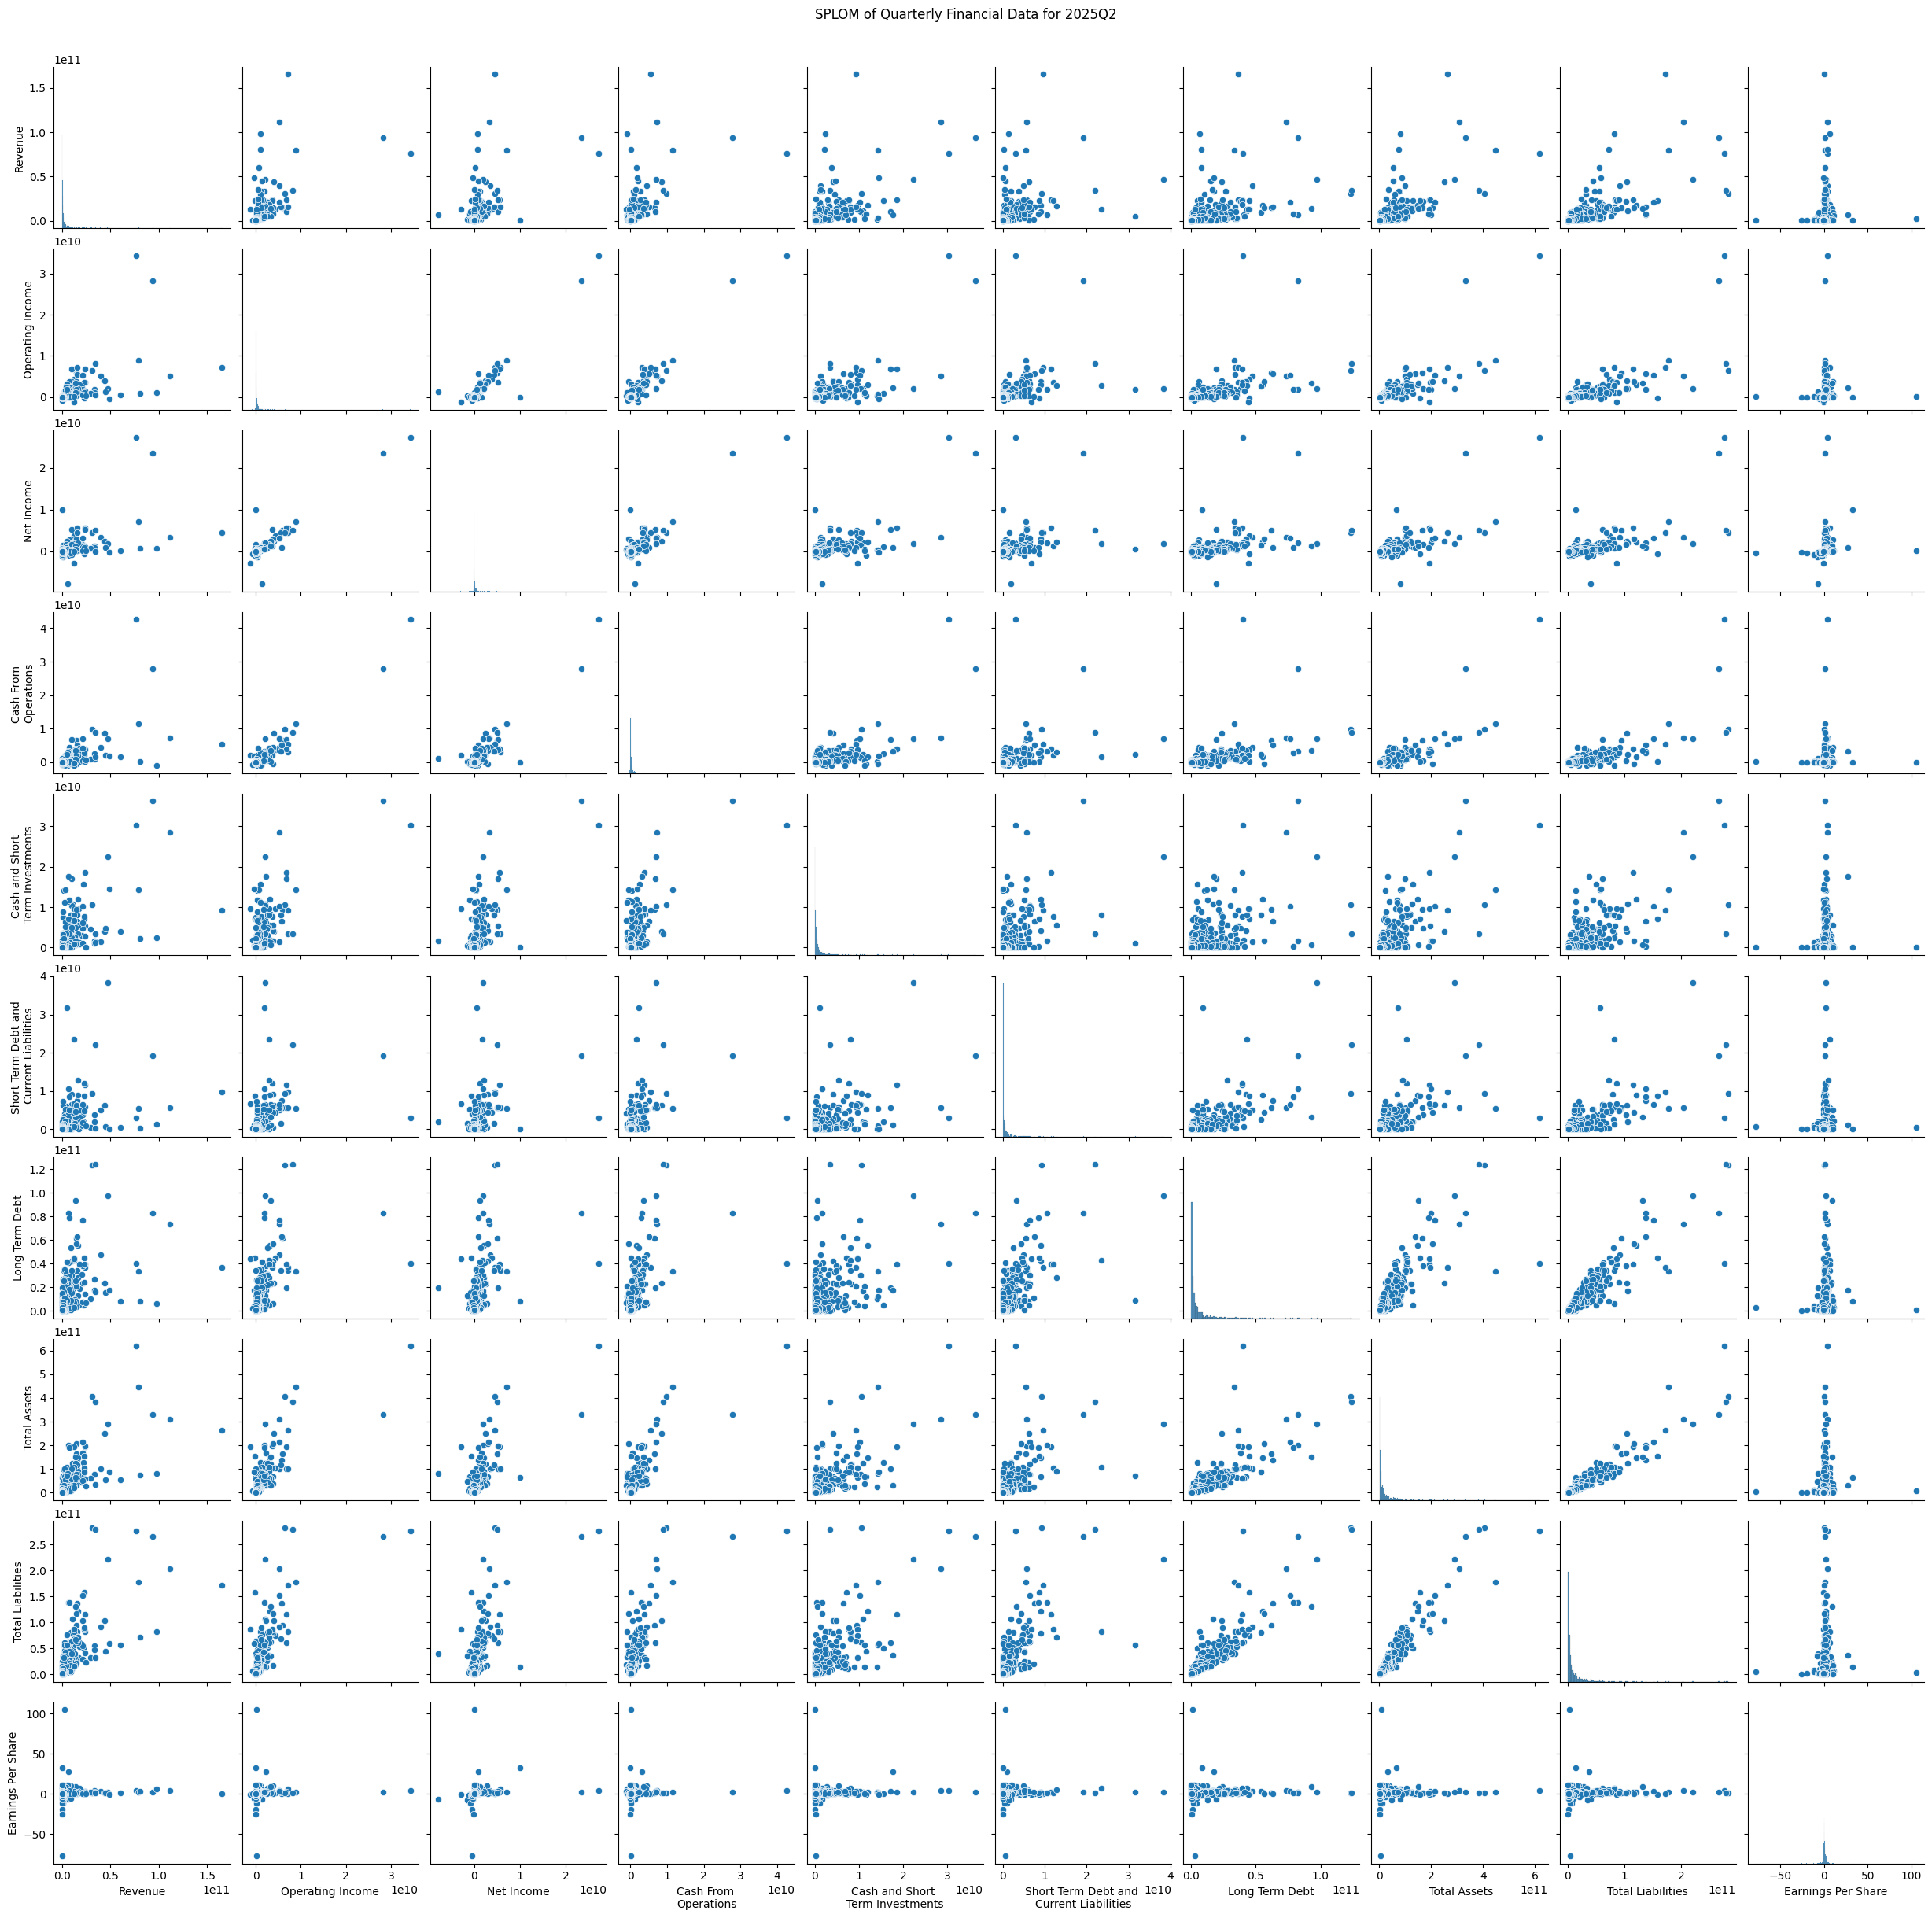

In [ ]:
quarter = '2025Q2'
column = [f'Revenue_{quarter}',
           f'OperatingIncome_{quarter}',
           f'NetIncome_{quarter}',
           f'CashFromOps_{quarter}',
           f'CashAndSTInvestments_{quarter}',
           f'ShortTermDebtOrCurrentLiab_{quarter}',
           f'LongTermDebt_{quarter}',
           f'TotalAssets_{quarter}',
           f'TotalLiabilities_{quarter}',
           f'EPS_{quarter}'
           ]

splom_data = dataset[column].dropna()

columns = ['Revenue','Operating Income','Net Income','Cash From \nOperations','Cash and Short \nTerm Investments','Short Term Debt and \nCurrent Liabilities','Long Term Debt',' Total Assets','Total Liabilities','Earnings Per Share']

splom_data.columns = columns
g = sns.pairplot(splom_data, diag_kind="hist")
g.fig.suptitle(f"SPLOM of Quarterly Financial Data for {quarter}")
g.fig.subplots_adjust(top=0.95);

We can definitely see some linear correlations in this data. Let's draw up a correlation heatmap.

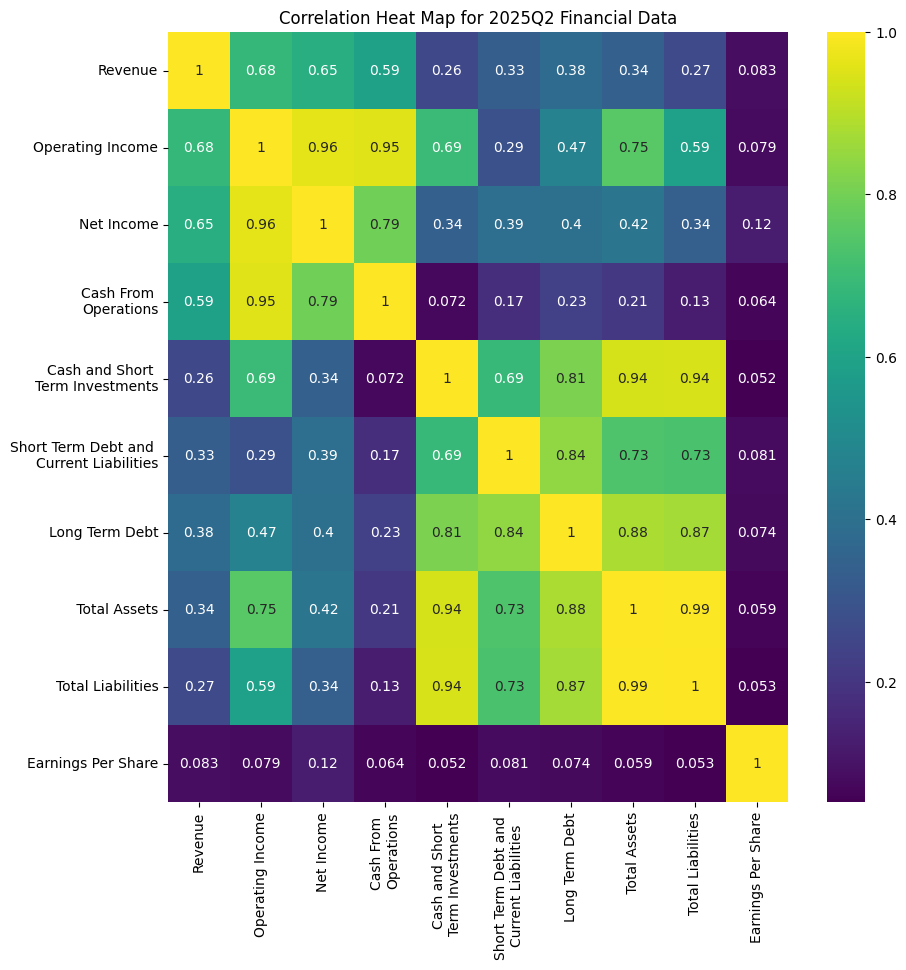

In [ ]:
quarter_data = dataset[column]
quarter_data.columns = columns
corr = quarter_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='viridis',cbar=True)
plt.title(f'Correlation Heat Map for {quarter} Financial Data');

Based on initial looks, raw funamentals per quarter look like they may be weak predictors on their own (will test this with some supervised models on raw data).

## Feature Engineering  
Let's start thinking about stronger predictive features.  

### Profitability Ratios  
Operating margin = OperatingIncome/Revenue  
Net margin = Net Income/ Revenue  
Return on Assets (ROA)= Net Income/ Total Assets  
Return on Equity (ROE) = Net Income/ (Total Assets - Total Liabilities)  

### Liquidity and Leverage  
Current ratio = Cash and Short Term Investments/ Short Term Debt or Current Liabilities  
Debt/Assets = (Short Term Debt or Current Liabilities + Long Term Debt)/ Total Assets  
Debt/Equity = (Short Term Debt or Current Liabilities + Long Term Debt) / (Total Assets - Total Liabilities)  

### Cash Flow Strength  
Cash Flow Margin = CashFromOps/Revenue  
Cash Conversion = CashFromOps/NetIncome  

### Temporal Changes Quarter over Quarter
For Every Feature:
$\Delta F_t = \frac{F_t - F_{t-1}}{F_{t-1}}$ Where F = Feature.

### Rolling Averages/Volatility  
4-quarter average growth rate
Standard deviation of EPS or Revenue Growth  

### Additional Data  
P/E Ratio = Price / Earnings Per Share  
P/S Ratio = Price / Revenue Per Share  
EV/EBITDA = Not sure if we can get this data.